<a href="https://colab.research.google.com/github/zubrist/Machine-Learning/blob/main/LinearRegression(weather_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Linear Regression**



Sales Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the dataset
dataset = pd.read_csv("/content/drive/MyDrive/dataset/weather.csv")

### **1.Data Exploration**
Schema of the dataset

In [ ]:
dataset.head() #Schema of the dataset

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold



Finding out the number of rows*number of column in the dataset

In [ ]:
dataset.shape #Dimension of the DataSet,number of rows*number of columns 

(10000, 8)

### **2.Data Preprocessing**

In [ ]:
dataset.isna().sum()

Temperature_c           0
Humidity                0
Wind_Speed_kmh          0
Wind_Bearing_degrees    0
Visibility_km           0
Pressure_millibars      0
Rain                    0
Description             0
dtype: int64

In [ ]:
dataset.duplicated().any()

True

In [ ]:
dataset = dataset.drop(columns=['Description'])

In [ ]:
dataset = dataset.drop_duplicates()
dataset

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1
...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

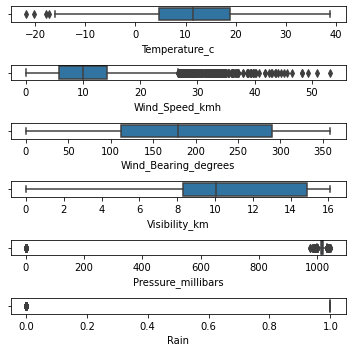

In [ ]:
fig, axs = plt.subplots(6, figsize = (5,5))
plt1 = sns.boxplot(dataset['Temperature_c'], ax = axs[0])
plt2 = sns.boxplot(dataset['Wind_Speed_kmh'], ax = axs[1])
plt3 = sns.boxplot(dataset['Wind_Bearing_degrees'], ax = axs[2])
plt3 = sns.boxplot(dataset['Visibility_km'], ax = axs[3])
plt3 = sns.boxplot(dataset['Pressure_millibars'], ax = axs[4])
plt3 = sns.boxplot(dataset['Rain'], ax = axs[5])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


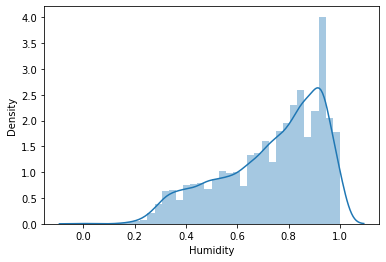

In [ ]:
sns.distplot(dataset['Humidity']);

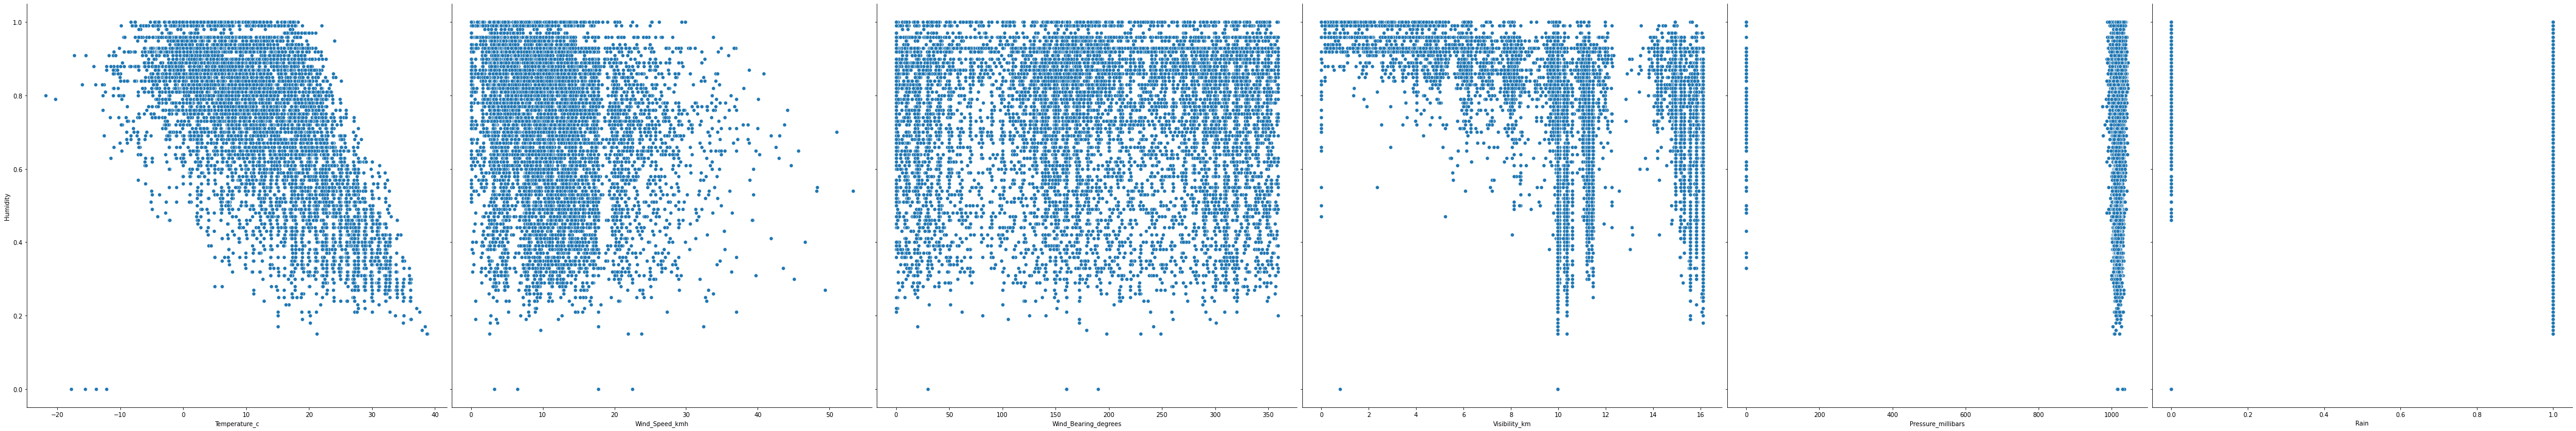

In [ ]:
sns.pairplot(dataset, x_vars=['Temperature_c', 'Wind_Speed_kmh', 'Wind_Bearing_degrees', 'Visibility_km', 'Pressure_millibars', 'Rain'], y_vars='Humidity', height=10, aspect=1, kind='scatter')

plt.show()

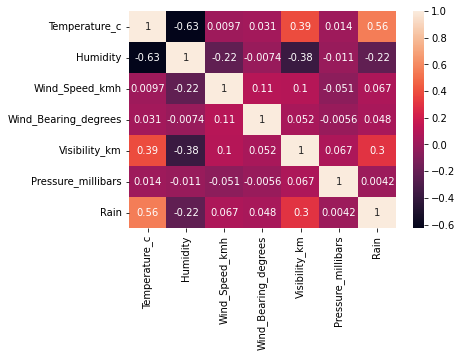

In [ ]:
sns.heatmap(dataset.corr(), annot = True)

plt.show()

### **3.Model Description**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**3.a Single Regression**

In [ ]:
#Setting the value for X and Y
x = dataset[['Temperature_c']]
y = dataset['Humidity']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
slr= LinearRegression()
slr.fit(x_train.values, y_train)

LinearRegression()

In [ ]:
#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  0.8913228006412208
Coefficient: [-0.01309996]


In [ ]:
print('Regression Equation: Sales = 0.8913228006412208 - 0.01309996 * TV')

Regression Equation: Sales = 0.8913228006412208 - 0.01309996 * TV


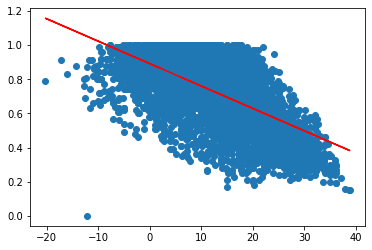

In [ ]:
#Line of best fit

plt.scatter(x_train, y_train)
plt.plot(x_train, 0.8913228006412208 - 0.01309996 * x_train, 'r')
plt.show()

In [ ]:
#Prediction of Test and Training set result
y_pred_slr= slr.predict(x_test.values)
x_pred_slr= slr.predict(x_train.values)

In [ ]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [0.525834   0.84736517 0.67793906 ... 0.74722327 0.65850746 0.60225042]


In [ ]:
#Actual value and the predicted value

slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
9707,0.46,0.525834
9335,0.76,0.847365
3854,0.47,0.677939
2029,0.82,0.798750
3539,0.78,0.884045
...,...,...
4208,0.93,0.811268
5334,0.62,0.629396
2554,0.77,0.747223
13,0.73,0.658507


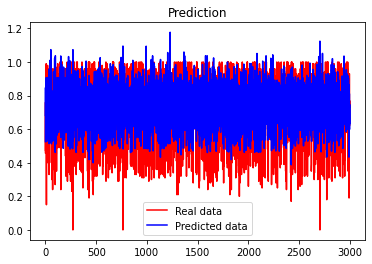

In [ ]:
plt.plot(y_test.values, color = 'red', label = 'Real data')
plt.plot(y_pred_slr, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
#Predict for any value
slr.predict([[56]])

array([0.15772521])

In [ ]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 39.53


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### **4.Performance Analysis(Single Regression)**

In [ ]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.12446699912336205
Mean Square Error: 0.024317209306832656
Root Mean Square Error: 0.15593976178907243


**3.b Multiple Regression**

In [ ]:
#Setting the value for X and Y
x = dataset[['Temperature_c', 'Wind_Speed_kmh', 'Wind_Bearing_degrees', 'Visibility_km', 'Pressure_millibars', 'Rain']]
y = dataset['Humidity']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)

In [ ]:
mlr= LinearRegression()
mlr.fit(x_train.values, y_train)

LinearRegression()

In [ ]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

0.9260458226436107


[('Temperature_c', -0.014380871606838206),
 ('Wind_Speed_kmh', -0.006344353548015517),
 ('Wind_Bearing_degrees', 5.580284562132663e-05),
 ('Visibility_km', -0.0068805887316434455),
 ('Pressure_millibars', -1.2554096820913932e-05),
 ('Rain', 0.1368689363391374)]

In [ ]:
#Predicting the Test and Train set result
y_pred_mlr= mlr.predict(x_test.values)
x_pred_mlr= mlr.predict(x_train.values)

In [ ]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.45096149 0.84153052 0.63696672 ... 0.79190476 0.7182165  0.62416959]


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
9707,0.46,0.450961
9335,0.76,0.841531
3854,0.47,0.636967
2029,0.82,0.805774
3539,0.78,0.878826
...,...,...
4208,0.93,0.859287
5334,0.62,0.517525
2554,0.77,0.791905
13,0.73,0.718216


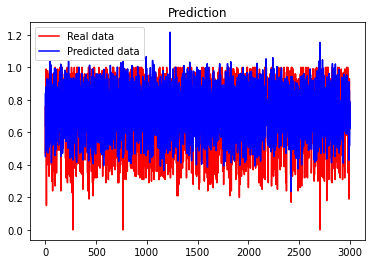

In [ ]:
plt.plot(y_test.values, color = 'red', label = 'Real data')
plt.plot(y_pred_mlr, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
#Predict for any value
mlr.predict([[56, 55, 67, 65, 57, 60]])

array([7.53969869])

In [ ]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 49.08


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### **4.Performance Analysis**

In [ ]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.11260614061621833
Mean Square Error: 0.02080714533683866
Root Mean Square Error: 0.14424682088988533
